In [1]:
image_folder = "../images/"
model_folder = "../models/"

# 1. Gesture Recognizer with MediaPipe Tasks
This notebook shows you how to use MediaPipe Tasks Python API to recognize hand gestures in images.   
출처: https://github.com/googlesamples/mediapipe/blob/main/examples/gesture_recognizer/python/gesture_recognizer.ipynb

In [2]:
# !pip install -q mediapipe==0.10.0

In [3]:
# !wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [4]:
# @markdown We implemented some functions to visualize the gesture recognition results. <br/> Run the following cell to activate the functions.
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2
import math

plt.rcParams.update(
    {
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        "xtick.labelbottom": False,
        "xtick.bottom": False,
        "ytick.labelleft": False,
        "ytick.left": False,
        "xtick.labeltop": False,
        "xtick.top": False,
        "ytick.labelright": False,
        "ytick.right": False,
    }
)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(
            title, fontsize=int(titlesize), color="black", fontdict={"verticalalignment": "center"}, pad=int(titlesize / 1.5)
        )
    return (subplot[0], subplot[1], subplot[2] + 1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results=None):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot = (rows, cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE, FIGSIZE / cols * rows))
    else:
        plt.figure(figsize=(FIGSIZE / rows * cols, FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[: rows * cols], gestures[: rows * cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE * SPACING / max(rows, cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
            hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
            hand_landmarks_proto.landmark.extend(
                [landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks]
            )

            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks_proto,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style(),
            )

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

In [5]:
import urllib

IMAGE_FILENAMES = ["thumbs_down.jpg", "victory.jpg", "thumbs_up.jpg", "pointing_up.jpg"]

for name in IMAGE_FILENAMES:
    url = f"https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/{name}"
    urllib.request.urlretrieve(url, image_folder + name)

thumbs_down.jpg
victory.jpg
thumbs_up.jpg
pointing_up.jpg


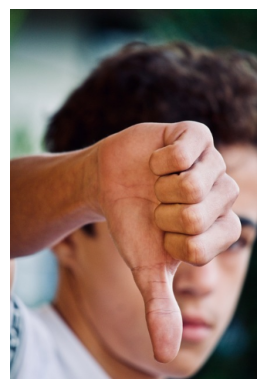

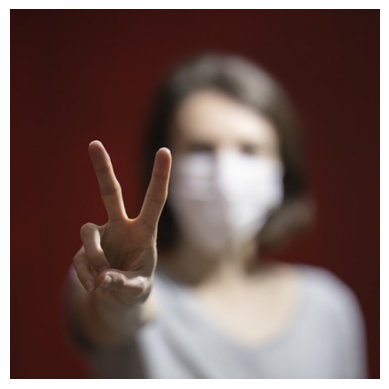

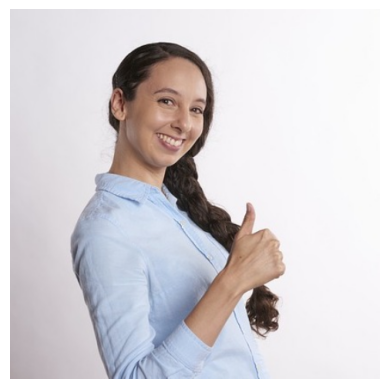

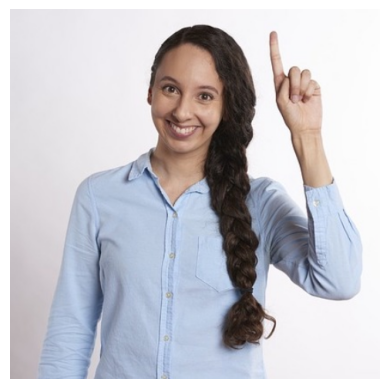

In [6]:
import cv2
import numpy as np
from PIL import Image
import math


DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480


def resize_and_show(name, image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h / (w / DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w / (h / DESIRED_HEIGHT)), DESIRED_HEIGHT))
    # show_img(name, img)
    plt.figure()
    plt.imshow(img)


# Preview the images.
# images = {name: rgb(cv2.imread(image_folder + name)) for name in IMAGE_FILENAMES}
# images = {name: np.array(Image.open(image_folder + name)) for name in IMAGE_FILENAMES}
images = {name: mp.Image.create_from_file(image_folder + name).numpy_view() for name in IMAGE_FILENAMES}
for name, image in images.items():
    print(name)
    resize_and_show(name, image)


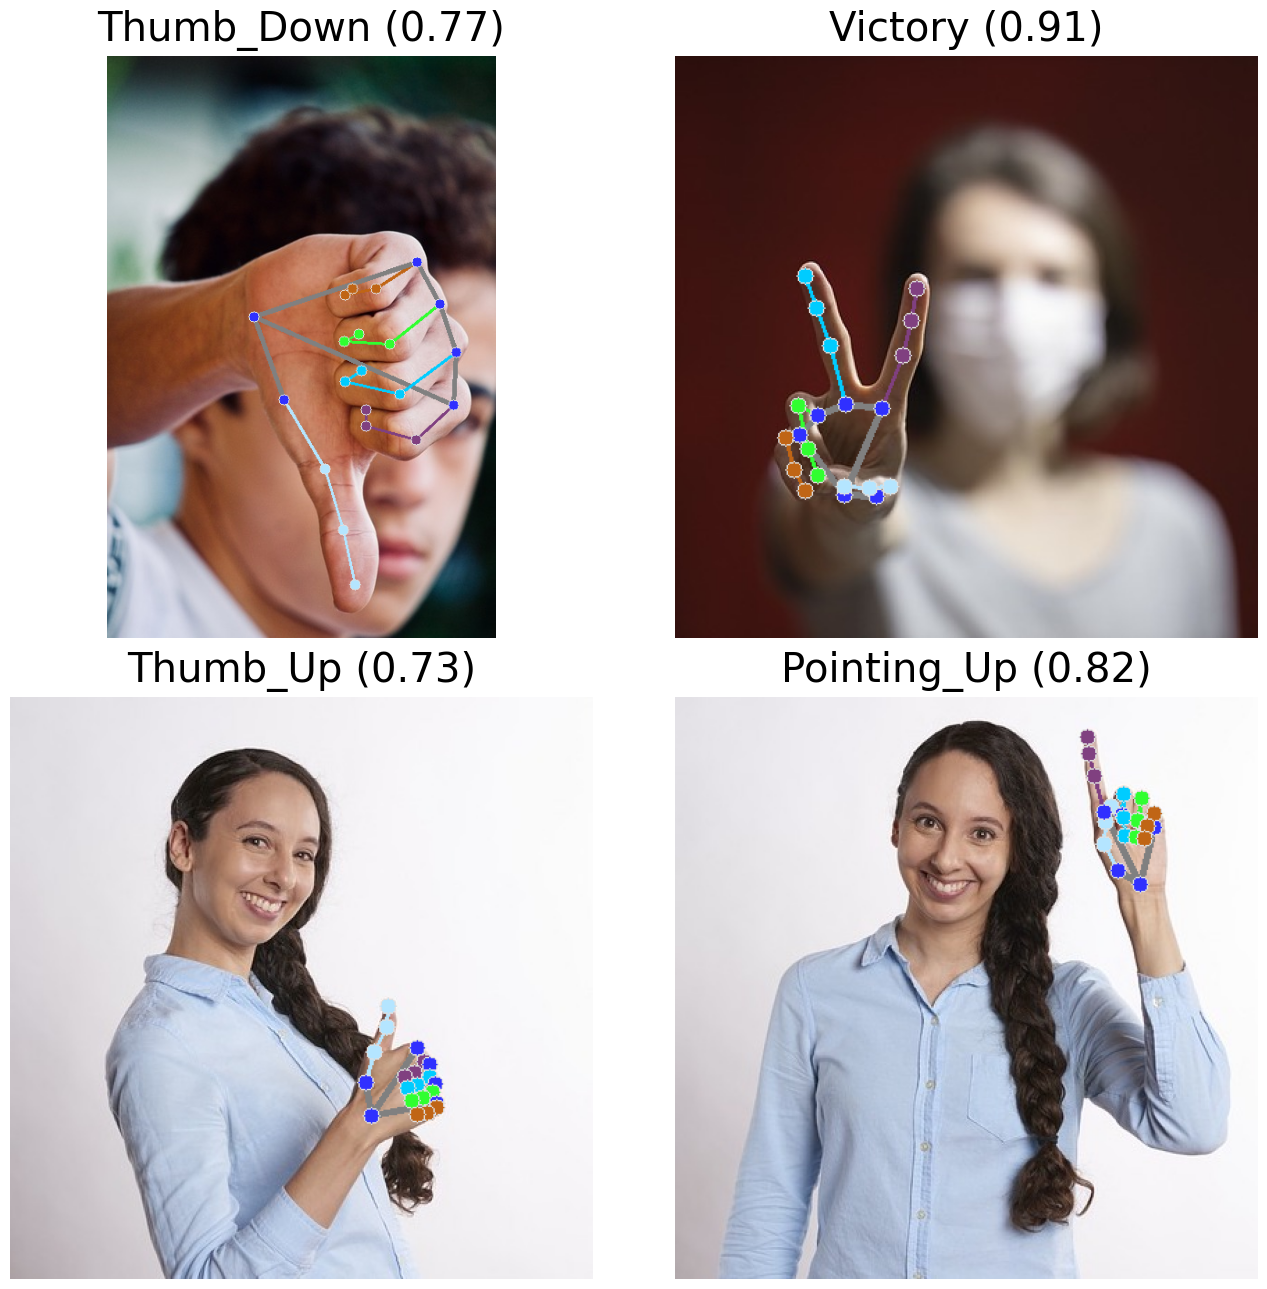

In [7]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path=model_folder + "gesture_recognizer.task")
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

images = []
results = []
for image_file_name in IMAGE_FILENAMES:
    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(image_folder + image_file_name)

    # STEP 4: Recognize gestures in the input image.
    recognition_result = recognizer.recognize(image)

    # STEP 5: Process the result. In this case, visualize it.
    images.append(image)
    top_gesture = recognition_result.gestures[0][0]
    hand_landmarks = recognition_result.hand_landmarks
    results.append((top_gesture, hand_landmarks))

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)

# 2. Hand Landmarks Detection with MediaPipe Tasks
This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.   
출처: https://github.com/googlesamples/mediapipe/blob/main/examples/hand_landmarker/python/hand_landmarker.ipynb

In [8]:
# !wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task -O ../hand_landmarker.task

In [9]:
# @markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54)  # vibrant green


def draw_landmarks_on_image(rgb_image, detection_result):
    hand_landmarks_list = detection_result.hand_landmarks
    handedness_list = detection_result.handedness
    annotated_image = np.copy(rgb_image)

    # Loop through the detected hands to visualize.
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx]
        handedness = handedness_list[idx]

        # Draw the hand landmarks.
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        hand_landmarks_proto.landmark.extend(
            [landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks]
        )
        solutions.drawing_utils.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            solutions.hands.HAND_CONNECTIONS,
            solutions.drawing_styles.get_default_hand_landmarks_style(),
            solutions.drawing_styles.get_default_hand_connections_style(),
        )

        # Get the top left corner of the detected hand's bounding box.
        height, width, _ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        text_x = int(min(x_coordinates) * width)
        text_y = int(min(y_coordinates) * height) - MARGIN

        # Draw handedness (left or right hand) on the image.
        cv2.putText(
            annotated_image,
            f"{handedness[0].category_name}",
            (text_x, text_y),
            cv2.FONT_HERSHEY_DUPLEX,
            FONT_SIZE,
            HANDEDNESS_TEXT_COLOR,
            FONT_THICKNESS,
            cv2.LINE_AA,
        )

    return annotated_image

In [10]:
!wget -q -O ../images/woman_hands.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

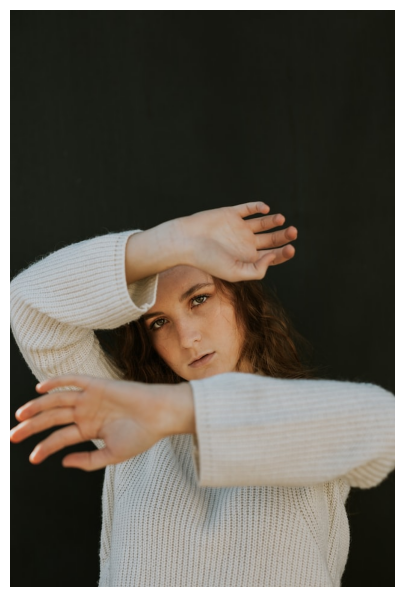

In [11]:
def rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image: np.ndarray = rgb(cv2.imread(image_folder + "woman_hands.jpg"))
plt.figure(figsize=(5, 7.5))
plt.imshow(image);

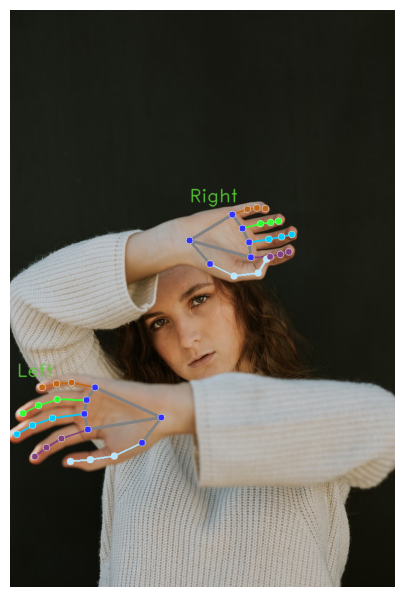

In [12]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path=model_folder + "hand_landmarker.task")
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(image_folder + "woman_hands.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# show_img("woman_hands.jpg", cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.figure(figsize=(5, 7.5))
plt.imshow(annotated_image);

# 3. MediaPipe Documentation
https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models